# Elaborazioni di dati ISTAT con Geopandas

## sorgenti dati

### Basi territoriali e variabili censuarie 
https://www.istat.it/it/archivio/104317

#### confini amministrativi
https://www.istat.it/it/archivio/222527

![tabella_confini_istat](img/tabella_confini_istat.png)

##### confini
versione non generalizzata al 2018 - proiezione WGS84 UTM32N **[EPSG:32632](https://epsg.io/32632)**

http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip

<a name="download"><h1>Scaricamento dei dati</h1></a>
import delle librerie necessarie

In [1]:
import requests
import zipfile
import io

In [2]:
zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

In [3]:
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

questo genera la cartella _"Limiti01012018"_ che a sua volta contiene:

- _Com01012018_ : confini comunali
- _ProvCM01012018_ : confini provinciali
- _Reg01012018_ : confini regionali
- _RipGeo01012018_ : ripartizioni geografiche

Totale 108 Mb

# Geopandas
import di <a href="http://geopandas.org/">geopandas</a>

<a name="load"><h2>creazione di un geodataframe</h2></a>

prendiamo come esempio le Ripartizioni Geografiche d'Italia al 2018 (Nord-Ovest, Nord-Est, Centro, Isole e Sud)

In [6]:
import geopandas as gpd
import os
#istruzione necessarie per visualizzare le mappe in jupyter
%matplotlib inline

caricamento del file RipGeo01012018

In [7]:
ripartizioni_geografiche = gpd.read_file("Limiti01012018" + os.sep + "RipGeo01012018" + os.sep + "RipGeo01012018.shp")

<a name="readcontent"><h2>cosa contiene il geodataframe</h2></a>

In [8]:
ripartizioni_geografiche

,COD_RIP,DEN_RIP,SHAPE_Leng,SHAPE_Area,geometry
0,2,Nord-Est,2.533131e+06,6.232594e+10,(POLYGON ((852603.4834000003 5080093.183700001...
1,1,Nord-Ovest,2.671559e+06,5.792678e+10,"(POLYGON ((459010.2297999999 4906246.5803, 458..."
2,3,Centro,2.407106e+06,5.808371e+10,"(POLYGON ((625766.3239000002 4754785.0197, 625..."
3,5,Isole,3.860050e+06,4.993163e+10,"(POLYGON ((1054330.9396 4140712.709000001, 105..."
4,4,Sud,3.118909e+06,7.379777e+10,(POLYGON ((930273.4244999997 4714737.742000001...


<a name="viewmap"><h2>visualizzazione geometrie</h2></a>

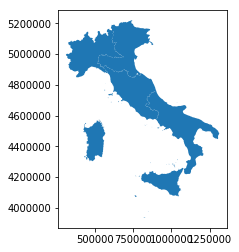

In [9]:
ripartizioni_geografiche.plot()

<a name="mapforcolumn"><h2>un colore per ogni area</h2></a>
La colonna scelta che distingue in maniera univoca le ripartizioni geografiche ha nome *DEN_RIP* e contiene i singoli nomi delle ripartizioni geografiche

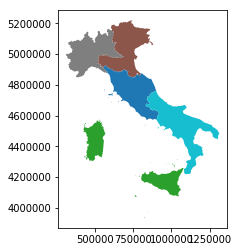

In [10]:
ripartizioni_geografiche.plot(column='DEN_RIP')

<a name="addlegend"><h3>aggiungere la legenda</h3></a>
migliramento della mappa aggiugendo una legenda

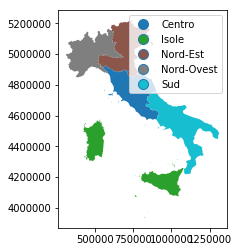

In [11]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True)

<a name="figsize"><h3>una immagine più grande</h3></a>
aggiungendo il parametro figsize a cui si aggiungono le dimensioni in pollici di x e y si ingrandisce l'immagine

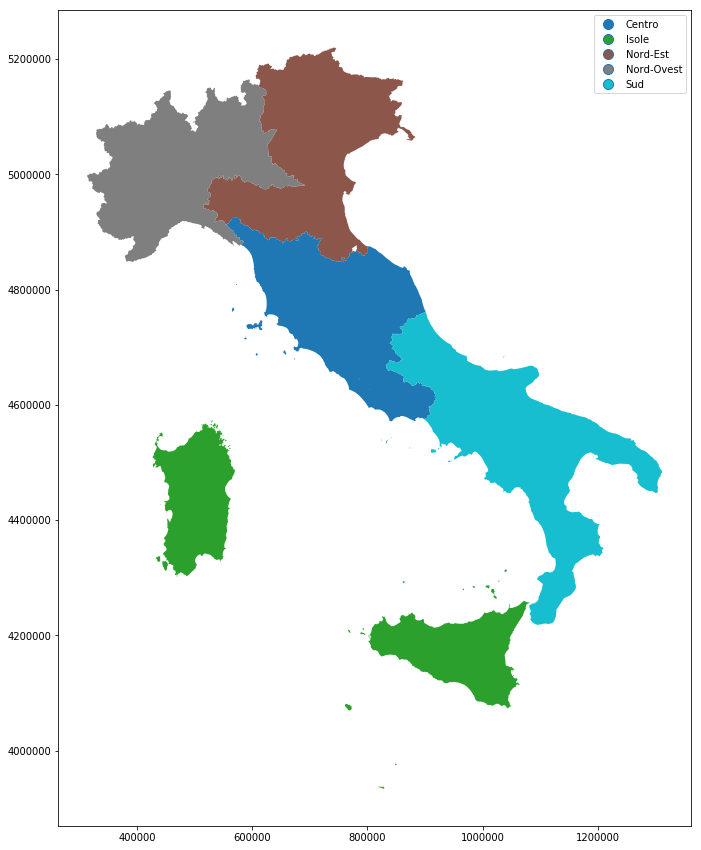

In [12]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(15,15))

<a name="colorscale"><h3>cambio della scala colori</h3></a>
la scala colori può essere scelta per fare [quelle offerte da maptplotlib](https://matplotlib.org/users/colormaps.html) 

*DEN_REG* è una variabile categorica che deve evidenziare per bene ciascuna regione senza creare confusione, pertanto si suggerisci di [scegliere](https://matplotlib.org/users/colormaps.html#list-colormaps) una scala colori fra quelle cartegorizzate come "divergente" 
![divergente](https://matplotlib.org/_images/grayscale_01_03.png)


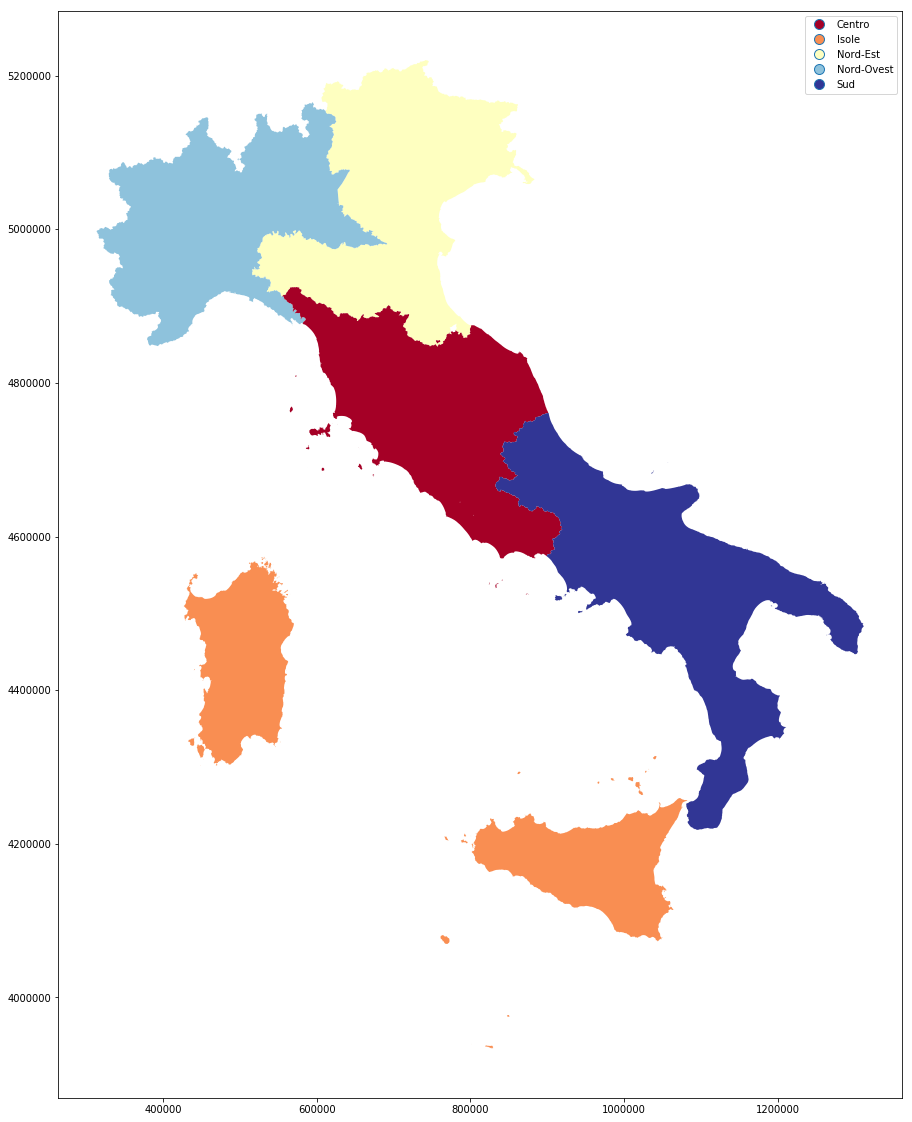

In [13]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(20,20),cmap="RdYlBu")

<a name="border"><h3>evidenziare i bordi</h3></a>
I bordi possono essere evidenziati usando i parametri *linewidth* e *edegecolor*

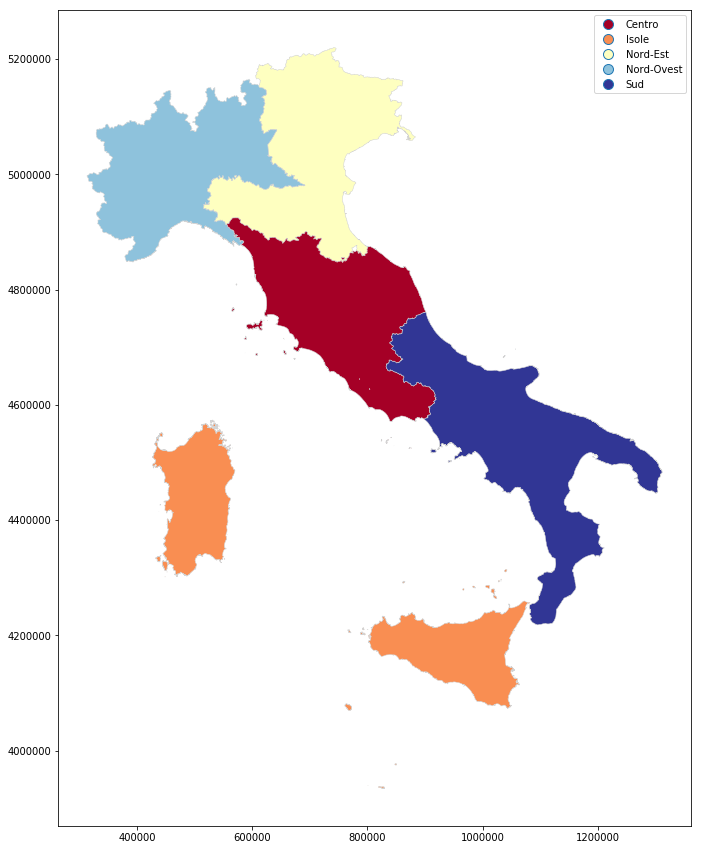

In [14]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(15,15),cmap="RdYlBu", edgecolor = "lightgrey", linewidth = 0.5)

<a name="createlabels"><h2>Aggiungere etichette alla mappa</h2></a>
La mappa ha bisogno di essere arricchita con il nome delle ripartizioni geografiche sopra ogni corrispettiva geometria.
Per fare questo è necessario stabilire dove far apparire l'etichetta attraverso le coordinate geografiche.
Si può scegliere quindi di calcolare un punto che sia significativo per ogni geometria.
Quello più semplice ed immediato da calcolare è il *centroide* che in geopandas si ottiene in questo modo

In [15]:
ripartizioni_geografiche.centroid

0    POINT (701955.0400406007 5039877.207536004)
1    POINT (478144.2626602718 5011450.499354753)
2    POINT (756706.1939528083 4757681.301710429)
3    POINT (736510.8126530694 4300289.284363961)
4     POINT (1061529.19722656 4529724.360734882)
dtype: object

la cui distribuzione sulla mappa appare così

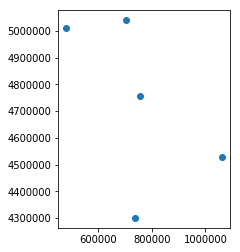

In [14]:
ripartizioni_geografiche.centroid.plot()

esiste anche il metodo [representative_point()](http://geopandas.org/reference.html?highlight=representative_point#geopandas.GeoSeries.representative_point) che calcola, per ogni geometria, quello che è il più rappresentativo

In [16]:
ripartizioni_geografiche.representative_point()

0     POINT (696177.6980534061 5033674.6388)
1    POINT (498289.3859768431 5006600.53385)
2    POINT (757542.6437202122 4748065.48845)
3     POINT (942181.712401716 4166109.38245)
4     POINT (1085274.088699356 4489491.1233)
dtype: object

ed infatti la disposizione è molto diversa

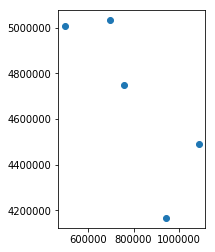

In [17]:
ripartizioni_geografiche.representative_point().plot()

<a name="geoseries2geodataframe"><h2>trasformare i punti calcolati in geodataframe</h2></a>
Per visualizzare questi punti sopra la mappa è necessario creare un nuovo geodataframe da utilizzare come "layer" sopra quello delle ripartizioni geografiche

In [35]:
punti_rappresentativi = gpd.GeoDataFrame(ripartizioni_geografiche.representative_point()).reset_index()

In [36]:
type(punti_rappresentativi)

geopandas.geodataframe.GeoDataFrame

investighiamo sulle colonne del geodataframe creato

In [37]:
punti_rappresentativi.columns

Index(['index', 0], dtype='object')

il geodataframe creato non ha un colonna di tipo 'geometry', infatti, se si prova a disegnarlo, da errore

No geometry data set yet (expected in column 'geometry'.


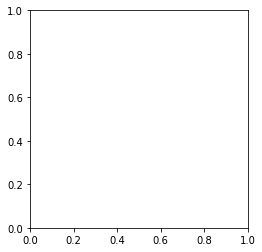

In [38]:
try:
    punti_rappresentativi.plot()
except Exception as e:
    print(e)

è quindi necessario identificare quale è la colonna che contiene la geometria (nel  nostro caso *0*).
Per comodità questa viene anche rinominata in *"geometry"*

In [39]:
punti_rappresentativi = punti_rappresentativi.rename(columns={0:'geometry'}).set_geometry('geometry')

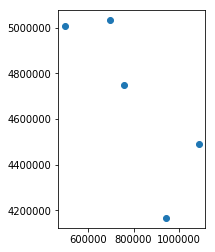

In [40]:
punti_rappresentativi.plot()

In [41]:
punti_rappresentativi

,index,geometry
0,0,POINT (696177.6980534061 5033674.6388)
1,1,POINT (498289.3859768431 5006600.53385)
2,2,POINT (757542.6437202122 4748065.48845)
3,3,POINT (942181.712401716 4166109.38245)
4,4,POINT (1085274.088699356 4489491.1233)


<a name="addattributes"><h3>aggiungere i nomi da associare alle etichette</h3></a>
Per aggiungere i nomi da associare alle etichette è necessario prima estrarre la colonna del geodataframe delle ripartizioni geografiche che la contiene e creare un dataframe.

In [42]:
etichette = ripartizioni_geografiche.DEN_RIP.to_frame().reset_index()

In [43]:
type(etichette)

pandas.core.frame.DataFrame

ora è possibile unire la colonna con le etichette al geodataframe che contiene i punti significativi

In [44]:
punti_rappresentativi = punti_rappresentativi.merge(etichette,on="index")

per questioni di stile si rinonoma *"DEN_RIP"* in *"etichette"*

In [45]:
punti_rappresentativi = punti_rappresentativi.rename(columns={'DEN_RIP':'etichette'})

ed ecco il nuovo geodataframe completo di punti e di etichette

In [46]:
punti_rappresentativi

,index,geometry,etichette
0,0,POINT (696177.6980534061 5033674.6388),Nord-Est
1,1,POINT (498289.3859768431 5006600.53385),Nord-Ovest
2,2,POINT (757542.6437202122 4748065.48845),Centro
3,3,POINT (942181.712401716 4166109.38245),Isole
4,4,POINT (1085274.088699356 4489491.1233),Sud


<a name="addlayer"><h2>Visualizzare i punti individuati sopra la mappa</h2></a>
Questa operazione richiede di avere una "tela" dove andare a disegnare le varie geometrie in sequenza come degli strati (= layer). 
L'ultimo inserito è quello in cima alla visualizzazione.

In [47]:
import matplotlib.pyplot as plt

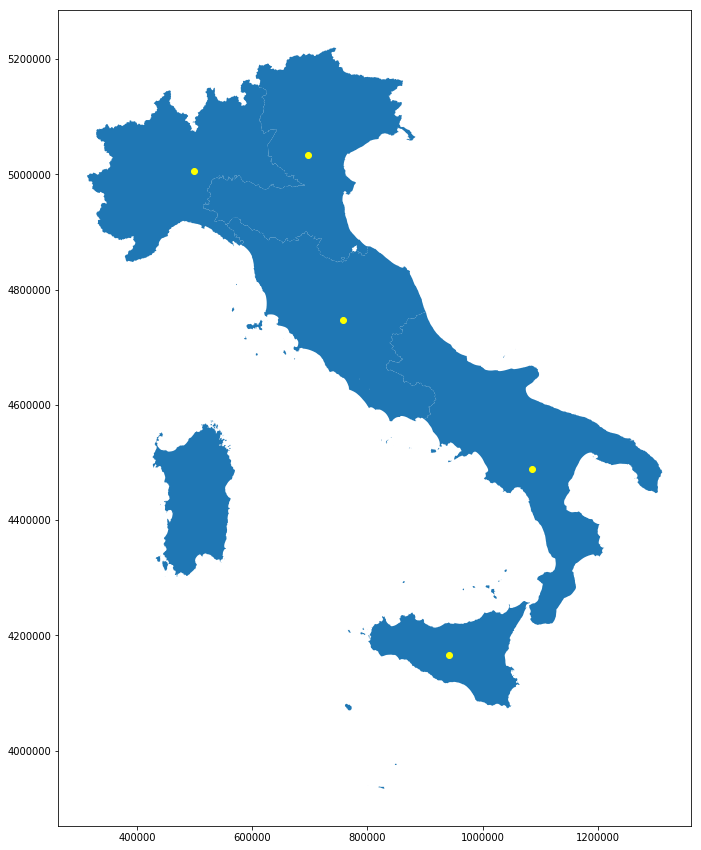

In [48]:
f, tela = plt.subplots(1,figsize = (15, 15))
ripartizioni_geografiche.plot(ax=tela,figsize=(15,15))
punti_rappresentativi.plot(ax=tela,color='yellow')
plt.show()

<a name="addlabels"><h2>Visualizzare i punti individuati sopra la mappa</h2></a>
questa operazione richiede di avere una lista contenente, per ogni voce, una tupla con la sequenza longitudine, latitudine ed etichetta (es. *x,y,label*) che viene poi aggiunta alla mappa.

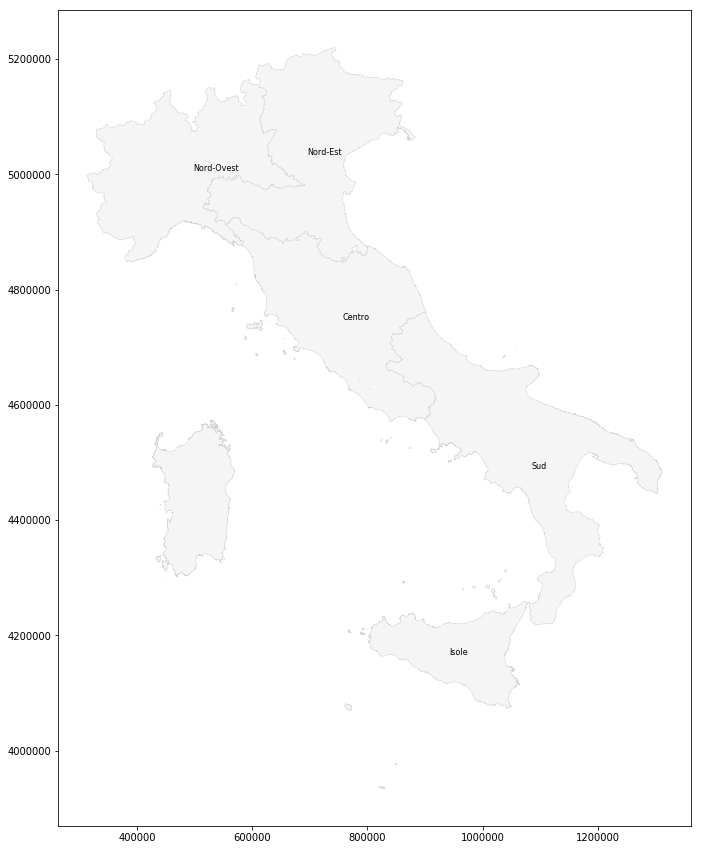

In [51]:
testi = []
tela = ripartizioni_geografiche.plot(figsize = (15, 15), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

for x, y, label in zip(punti_rappresentativi.geometry.x, punti_rappresentativi.geometry.y, punti_rappresentativi["etichette"]):
    testi.append(plt.text(x, y, label, fontsize = 8))

<a name="geocode"><h1>Il geocoder in geopandas</h1></a>
Il geocoder integrato in geopandas è una estensione del modulo [geopy](https://geopy.readthedocs.io/en/stable/)

Supponiamo di voler individuare un elenco di città da inserire in un geodataframe con la colonna *nome_citta*

In [52]:
colonne = ['nome_citta']
citta = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
elenco_citta = gpd.GeoDataFrame(citta,columns=colonne)

In [53]:
elenco_citta

,nome_citta
0,Roma
1,Palermo
2,Trento
3,Genova
4,Bari
5,Trieste
6,Napoli
7,Cagliari
8,Messina
9,Lecce


il geodataframe creato è privo di coordinate geografiche, queste possono essere arricchite attraverso l'interrogazione di un geocoder.
In questo caso [arcgis](https://geocode.arcgis.com/arcgis/) 

In [58]:
%%time 
geoelenco_citta = gpd.tools.geocode(elenco_citta.nome_citta, provider="arcgis")
# è stata aggiunta l'istruzione %%time per mostrare in jupyter il tempo di elaborazione

CPU times: user 17.2 ms, sys: 11.2 ms, total: 28.4 ms
Wall time: 6.33 s


l'operazione di geocoder richiede tempo e potrebbe portare anche a degli errori di individuazione dovuti ad omonimia o nomi sbagliati.
I dati generati dal geocoder si presentano con il sistema di riferimento WGS84 ([EPSG:4326](https://epsg.io/4326))

### ecco il risultato 

In [60]:
geoelenco_citta

,geometry,address
0,POINT (12.49565000000007 41.90322000000003),Roma
1,POINT (13.36112000000003 38.12207000000006),Palermo
2,POINT (11.11926000000005 46.07005000000004),Trento
3,POINT (8.938980000000072 44.41039000000006),Genova
4,POINT (16.86666000000002 41.12587000000008),Bari
5,POINT (13.77269000000007 45.65757000000008),Trieste
6,POINT (14.25226000000004 40.84014000000008),Napoli
7,POINT (9.110490000000027 39.21454000000006),Cagliari
8,POINT (15.55308000000002 38.17837000000003),Messina
9,POINT (18.16801000000004 40.35795000000007),Lecce


e la sua rappresentazione

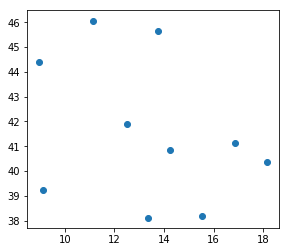

In [61]:
geoelenco_citta.plot()

<a name="crsconversion"><h1>conversione di coordinate</h1></a>
Capita spesso che i dataset che si trovano vengono distribuiti con sistemi di riferimento diversi.
Il caso visto sopra del geocoder offre dati proiettati in WGS84.
Se la proiezione è nota e non viene individuata nel caricamento dei dataset con geopandas, allora è necessario definirla.
Questa l'istruzione da utilizzare

per conoscerla

In [62]:
geoelenco_citta.crs 

{'init': 'epsg:4326', 'no_defs': True}

per assegnarla la prima volta

In [63]:
geoelenco_citta.crs = {'init':'epsg:4326'}

In [64]:
geoelenco_citta.geometry

0    POINT (12.49565000000007 41.90322000000003)
1    POINT (13.36112000000003 38.12207000000006)
2    POINT (11.11926000000005 46.07005000000004)
3    POINT (8.938980000000072 44.41039000000006)
4    POINT (16.86666000000002 41.12587000000008)
5    POINT (13.77269000000007 45.65757000000008)
6    POINT (14.25226000000004 40.84014000000008)
7    POINT (9.110490000000027 39.21454000000006)
8    POINT (15.55308000000002 38.17837000000003)
9    POINT (18.16801000000004 40.35795000000007)
Name: geometry, dtype: object

la proiezione del dataset geoelenco_citta è in wgs84, quella di ripartizioni_geografiche in UTM32N WGS84 (epsg:3262)
l'uso della stessa proiezione è necessaria per calcolare comparazioni spaziali e rappresentazioni corrette 

verifica se è stata assegnata la proiezione

In [65]:
ripartizioni_geografiche.crs

{}

in caso negativo è necessario assegnarla

In [67]:
ripartizioni_geografiche.crs = {'init':'epsg:32632'}

In [68]:
ripartizioni_geografiche.geometry

0    (POLYGON ((852603.4834000003 5080093.183700001...
1    (POLYGON ((459010.2297999999 4906246.5803, 458...
2    (POLYGON ((625766.3239000002 4754785.0197, 625...
3    (POLYGON ((1054330.9396 4140712.709000001, 105...
4    (POLYGON ((930273.4244999997 4714737.742000001...
Name: geometry, dtype: object

In [39]:
ripartizioni_geografiche.geometry

0    (POLYGON ((852603.4834000003 5080093.183700001...
1    (POLYGON ((459010.2297999999 4906246.5803, 458...
2    (POLYGON ((625766.3239000002 4754785.0197, 625...
3    (POLYGON ((1054330.9396 4140712.709000001, 105...
4    (POLYGON ((930273.4244999997 4714737.742000001...
Name: geometry, dtype: object

### conversione
una volta che sono note le proiezioni per ogni geodataframe allora è facile passare alla conversione

qui il geodataframe *geoelenco_citta* viene convertito nella stessa proiezione di quello di *ripartizioni_geografiche*

In [69]:
geoelenco_citta = geoelenco_citta.to_crs(epsg=32632)

e si vede subito il cambio di valori

In [70]:
geoelenco_citta

,geometry,address
0,POINT (789959.3580577425 4644942.382691314),Roma
1,POINT (882347.6057081512 4228352.002178628),Palermo
2,POINT (663890.6535953074 5104013.957498243),Trento
3,POINT (495141.6231543393 4917457.408282457),Genova
4,POINT (1160616.911134471 4582659.173878244),Bari
5,POINT (871823.8818152584 5067090.488763754),Trieste
6,POINT (942879.0457661359 4534306.116466856),Napoli
7,POINT (509538.5639221078 4340590.57150848),Cagliari
8,POINT (1074243.110497063 4245953.958764161),Messina
9,POINT (1279009.503048473 4508035.316408172),Lecce


e la rappresentazione

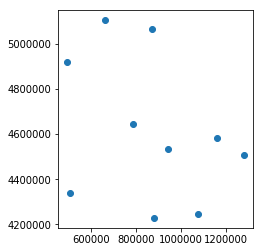

In [71]:
geoelenco_citta.plot()

<a name="showwgs84"><h3>visualizzazione di due diverse proiezioni</h3></a>
La rappresentazione di un geodataframe in due diverse proiezioni, in particolare se si usano gradi o metri, implica una deformazione

### proiezione in gradi (WGS84)

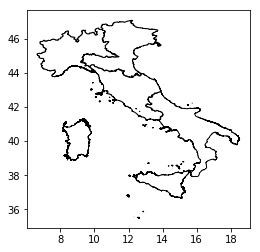

In [82]:
ripartizioni_geografiche.to_crs({"init": "epsg:4326"}).plot(color="white", edgecolor="black");

### proiezione in metri (UTM32N)

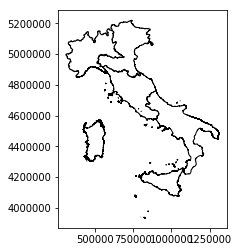

In [81]:
ripartizioni_geografiche.plot(color="white", edgecolor="black");

<a name="intersects"><h2>Intersezione fra geometrie</h2></a>
Se due geometrie si intersercano può essere capito visualizzandole in sovrapposizione 

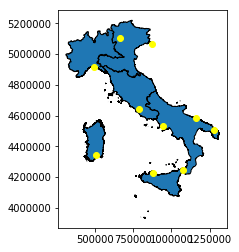

In [92]:
fig, tela = plt.subplots()
figsize = (15, 15)
ripartizioni_geografiche.plot(ax=tela, edgecolor="black");
geoelenco_citta.plot(ax=tela,color="yellow")

<a name="intersects"><h2>Individuare intersezioni fra geometrie</h2></a>
è possibile comunque conoscere se una geometria interseca un altra attraverso il metodo intersects() (e molti altri di comparazione fra geometrie).

### Esempio

In [103]:
for indiceripartizione in ripartizioni_geografiche.index:
    ripartizione = ripartizioni_geografiche.loc[indiceripartizione]
    for indicecitta in geoelenco_citta.index:
        citta = geoelenco_citta.loc[indicecitta]
        if citta.geometry.intersects(ripartizione.geometry) == True:
            messaggio="%s è nella ripartizione geografica %s" % (citta.address,ripartizione.DEN_RIP)
            print(messaggio)

Trento è nella ripartizione geografica Nord-Est
Trieste è nella ripartizione geografica Nord-Est
Genova è nella ripartizione geografica Nord-Ovest
Roma è nella ripartizione geografica Centro
Palermo è nella ripartizione geografica Isole
Cagliari è nella ripartizione geografica Isole
Messina è nella ripartizione geografica Isole
Bari è nella ripartizione geografica Sud
Napoli è nella ripartizione geografica Sud
Lecce è nella ripartizione geografica Sud


<a name="union"><h1>Estendere un geodataframe con un dataframe</h1></a>
Il sito [dati.istat.it](http://dati.istat.it) contiene tantissimi dati che possono poi essere rappresentati con mappe coropletiche.

Qui un esempio facendo uso dei dati della popolazione.

## Download dei dati
I dati sono disponibili nella loro interezza come file precalcolati con dimensioni molto gradi.

![rawdatadem](img/download_raw_data_istat.png)

Esempio:

l'intero file con la popolazione al 2018 è un file CSV da 398.607 Mb (che esplode in un file da 11Gb decompresso)

Per migliorare il download conviene selezionarsi quanto necessario

![esempio dati istat](img/dati_popolazione_istat.gif)



Per comodità qui si trova il file *DCIS_POPRES1_07022019152401769.csv* che contiene una estrazione per *regioni* con diversi indicatori di popolazione divisa per *sesso*, *stato civile* ed *età*




In [121]:
import pandas as pd
#  Popolazione residente al 1° gennaio da ISTAT
popolazione_regioni_italiane_2018 = pd.read_csv('data' + os.sep + "DCIS_POPRES1_07022019152401769.csv")

il file è un csv quindi va gestito con pandas

In [122]:
popolazione_regioni_italiane_2018.shape

(42840, 15)

si tratta di un file con 15 colonne e 42.840 righe

In [123]:
popolazione_regioni_italiane_2018.head(5)

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2018,2018,15535,NaN,NaN
1,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2018,2018,15535,NaN,NaN
2,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2018,2018,15040,NaN,NaN
3,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2018,2018,15040,NaN,NaN
4,ITC1,Piemonte,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2018,2018,30575,NaN,NaN


### caricamento del dataset con i confini regionali al 2018 in formato esri shapefile

In [124]:
regioni_2018 = gpd.read_file('Limiti01012018' + os.sep + 'Reg01012018' + os.sep + 'Reg01012018.shp')

### confronto fra i nomi delle regioni presenti nel csv con la popolazione e lo shapefile

In [125]:
import numpy as np

In [126]:
popolazione_regioni_italiane_2018.Territorio.unique()

array(['Piemonte', "Valle d'Aosta / Vallée d'Aoste", 'Liguria',
       'Lombardia', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [127]:
regioni_2018.head()

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,3,12,Lazio,1.201765e+06,1.723172e+10,(POLYGON ((769745.5108000003 4625758.608899999...
1,4,17,Basilicata,6.757507e+05,1.007311e+10,"(POLYGON ((1077662.7428 4576824.821, 1077714.0..."
2,1,3,Lombardia,1.511132e+06,2.386310e+10,"(POLYGON ((595652.3579000002 5163515.658, 5958..."
3,4,13,Abruzzo,6.645380e+05,1.083150e+10,(POLYGON ((930273.4244999997 4714737.742000001...
4,4,14,Molise,4.711976e+05,4.460437e+09,"POLYGON ((979228.8426000001 4673419.6483, 9792..."


In [128]:
popolazione_regioni_italiane_2018 = popolazione_regioni_italiane_2018.rename(columns={'Territorio':'DEN_REG'})

In [129]:
popolazione_regioni_italiane_2018.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta / Vallée d'Aoste", 'Liguria',
       'Lombardia', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [130]:
regioni_2018.DEN_REG.unique()

array(['Lazio', 'Basilicata', 'Lombardia', 'Abruzzo', 'Molise', 'Marche',
       'Liguria', "Valle d'Aosta", 'Umbria', 'Campania', 'Toscana',
       'Piemonte', 'Calabria', 'Puglia', 'Veneto',
       'Friuli Venezia Giulia', 'Emilia-Romagna', 'Trentino-Alto Adige',
       'Sicilia', 'Sardegna'], dtype=object)

In [131]:
np.intersect1d(popolazione_regioni_italiane_2018.DEN_REG.unique(),regioni_2018.DEN_REG.unique())

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte',
       'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Umbria', 'Veneto'],
      dtype=object)

In [132]:
indici_taa = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == 'Trentino Alto Adige / Südtirol'].index

In [133]:
for i in indici_taa:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = 'Trentino-Alto Adige'


In [134]:
indici_fvg = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == 'Friuli-Venezia Giulia'].index

In [135]:
for i in indici_fvg:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = 'Friuli Venezia Giulia'

In [136]:
indici_vda = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == "Valle d'Aosta / Vallée d'Aoste"].index

In [137]:
for i in indici_vda:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = "Valle d'Aosta"

In [138]:
popolazione_regioni_italiane_2018.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Veneto', 'Friuli Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [139]:
regioni_2018.DEN_REG

0                     Lazio
1                Basilicata
2                 Lombardia
3                   Abruzzo
4                    Molise
5                    Marche
6                   Liguria
7             Valle d'Aosta
8                    Umbria
9                  Campania
10                  Toscana
11                 Piemonte
12                 Calabria
13                   Puglia
14                   Veneto
15    Friuli Venezia Giulia
16           Emilia-Romagna
17      Trentino-Alto Adige
18                  Sicilia
19                 Sardegna
Name: DEN_REG, dtype: object

In [140]:
totale_popolazione_regioni = popolazione_regioni_italiane_2018[(popolazione_regioni_italiane_2018.Sesso=='totale') & (popolazione_regioni_italiane_2018['Stato civile'] =='totale') & (popolazione_regioni_italiane_2018.Età == 'totale')] 

# Mappe coropletiche

In [141]:
geo_popolazione_regione = regioni_2018.merge(totale_popolazione_regioni,on="DEN_REG").reset_index()

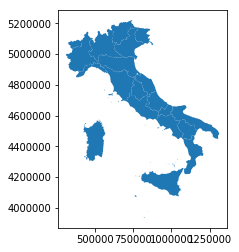

In [142]:
geo_popolazione_regione.plot()

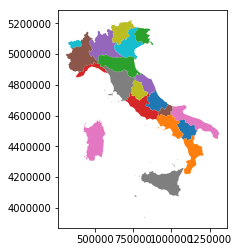

In [143]:
geo_popolazione_regione.plot(column='DEN_REG')

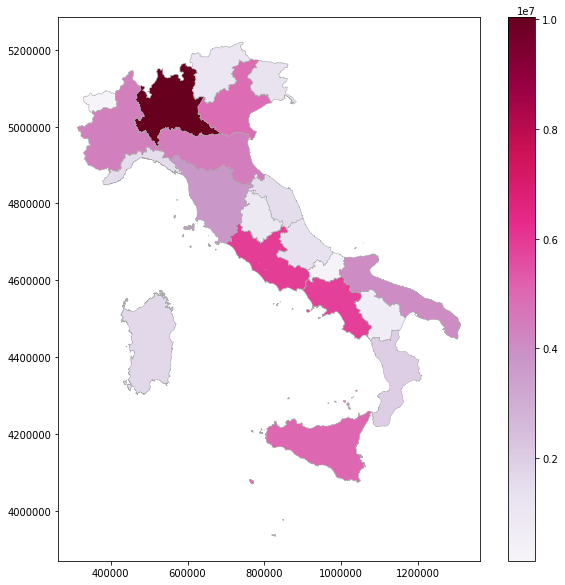

In [144]:
geo_popolazione_regione.plot(column='Value',cmap="PuRd", legend=True,edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [145]:
import pysal as pi

In [146]:
cinqueintervalli=pi.viz.mapclassify.Equal_Interval(geo_popolazione_regione.Value,k=4)

In [147]:
cinqueintervalli.yb

array([2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

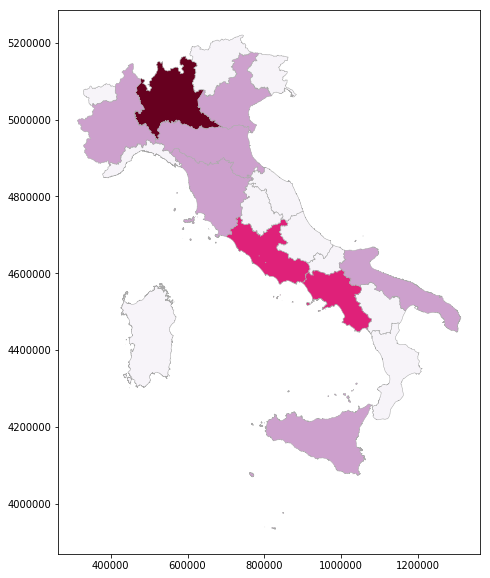

In [148]:
geo_popolazione_regione.assign(cl=cinqueintervalli.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [149]:
quantili=pi.viz.mapclassify.Quantiles(geo_popolazione_regione.Value)

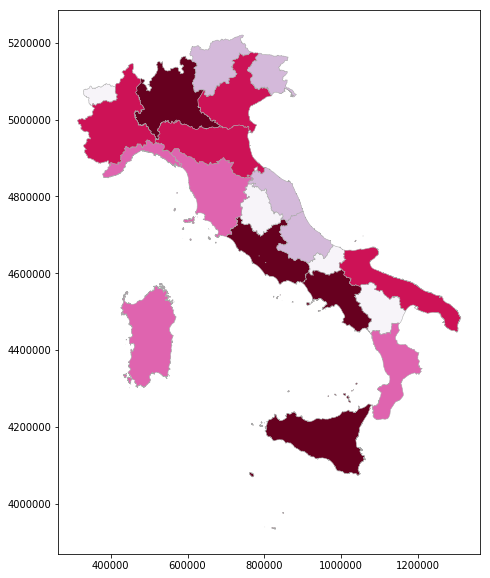

In [150]:
geo_popolazione_regione.assign(cl=quantili.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [151]:
geo_popolazione_regione.columns

Index(['index', 'COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry', 'ITTER107', 'TIPO_DATO15', 'Tipo di indicatore demografico',
       'SEXISTAT1', 'Sesso', 'ETA1', 'Età', 'STATCIV2', 'Stato civile', 'TIME',
       'Seleziona periodo', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [152]:
natural_breaks=pi.viz.mapclassify.Natural_Breaks(geo_popolazione_regione.Value)

In [153]:
percentile=pi.viz.mapclassify.Percentiles(geo_popolazione_regione.Value)

In [154]:
fisher_jenks=pi.viz.mapclassify.Fisher_Jenks(geo_popolazione_regione.Value)

In [155]:
geo_popolazione_regione = geo_popolazione_regione.assign(fisher_jenks=fisher_jenks.yb,percentile=percentile.yb,quantili=quantili.yb,natural_breaks=natural_breaks.yb)

In [156]:
geo_popolazione_regione.head()

,index,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,ITTER107,TIPO_DATO15,Tipo di indicatore demografico,...,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags,fisher_jenks,percentile,quantili,natural_breaks
0,0,3,12,Lazio,1.201765e+06,1.723172e+10,(POLYGON ((769745.5108000003 4625758.608899999...,ITE4,JAN,popolazione al 1º gennaio,...,totale,2018,2018,5896693,NaN,NaN,3,4,4,3
1,1,4,17,Basilicata,6.757507e+05,1.007311e+10,"(POLYGON ((1077662.7428 4576824.821, 1077714.0...",ITF5,JAN,popolazione al 1º gennaio,...,totale,2018,2018,567118,NaN,NaN,0,2,0,0
2,2,1,3,Lombardia,1.511132e+06,2.386310e+10,"(POLYGON ((595652.3579000002 5163515.658, 5958...",ITC4,JAN,popolazione al 1º gennaio,...,totale,2018,2018,10036258,NaN,NaN,4,5,4,4
3,3,4,13,Abruzzo,6.645380e+05,1.083150e+10,(POLYGON ((930273.4244999997 4714737.742000001...,ITF1,JAN,popolazione al 1º gennaio,...,totale,2018,2018,1315196,NaN,NaN,1,2,1,1
4,4,4,14,Molise,4.711976e+05,4.460437e+09,"POLYGON ((979228.8426000001 4673419.6483, 9792...",ITF2,JAN,popolazione al 1º gennaio,...,totale,2018,2018,308493,NaN,NaN,0,1,0,0


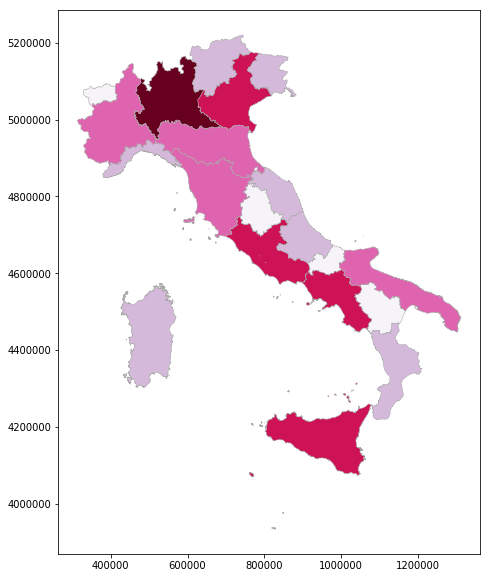

In [157]:
geo_popolazione_regione.plot(column='natural_breaks',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

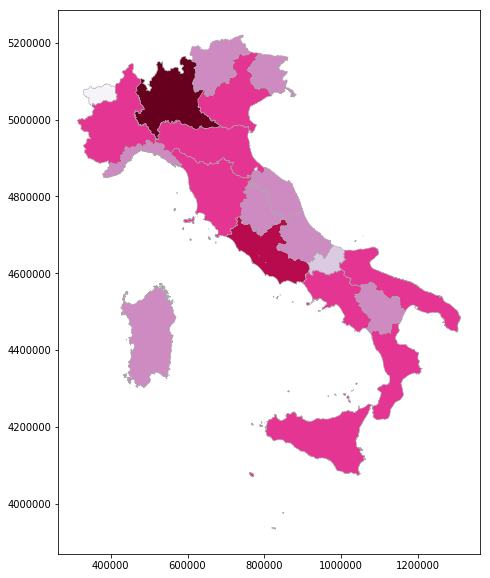

In [158]:
geo_popolazione_regione.plot(column='percentile',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [159]:
geo_popolazione_regione.sort_values('Value',ascending=False).DEN_REG

2                 Lombardia
0                     Lazio
9                  Campania
18                  Sicilia
14                   Veneto
16           Emilia-Romagna
11                 Piemonte
13                   Puglia
10                  Toscana
12                 Calabria
19                 Sardegna
6                   Liguria
5                    Marche
3                   Abruzzo
15    Friuli Venezia Giulia
17      Trentino-Alto Adige
8                    Umbria
1                Basilicata
4                    Molise
7             Valle d'Aosta
Name: DEN_REG, dtype: object

In [160]:
natural_breaks.bins

array([  884640.,  1956687.,  4452629.,  5896693., 10036258.])